<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🔧 Basic functions
def snake_columns(df):
    """
    Standardizes and returns snake_case columns
    """
    df.columns=[col.lower().replace(" ","_") for col in df.columns]

def change_to_datetime(df):
    """
    Changing date to datetime formate
    """
    df['date'] = pd.to_datetime(df['date'])
    return df

def outliers(df):
    """
    Function to identify all outliers
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

<h1 style="color: #e3db24;">01 | Data Extraction and Exploration</h1>

https://www.govdata.de/suche/daten/baume

In [7]:
data = pd.read_csv("https://geo.sv.rostock.de/download/opendata/baeume/baeume.csv") # data updated on 5th December 2024

<h2 style="color: #ec7511;">Copy as Best Practice</h2>

In [9]:
df1 = data.copy()

<h2 style="color: #ec7511;">Exploring the Data (First Impressions)</h2>

In [11]:
df1.shape

(71204, 13)

In [12]:
df1.head(10)

,latitude,longitude,uuid,gattung_botanisch,gattung_deutsch,art_botanisch,art_deutsch,alleebaum,hoehe,stammdurchmesser,stammumfang,kronendurchmesser,baumpatenschaft
0,54.06,12.10,d04f4edf-c22b-481d-8140-f5da1203b9c7,Acer,Ahorn,Acer platanoides,Spitz-Ahorn,0,8.00,NaN,NaN,6.00,0
1,54.05,12.10,9ac13cb1-d6fa-42ae-9374-0300965a97d7,Acer,Ahorn,Acer platanoides,Spitz-Ahorn,0,8.00,NaN,NaN,6.00,0
2,54.07,12.12,253aad1a-c704-40fb-8401-7d88f94559d2,Quercus,Eiche,Quercus robur,Stiel-Eiche,0,18.00,35.00,109.96,12.00,0
3,54.07,12.11,d7a4e358-8634-4497-988e-d2e51487d1cb,Acer,Ahorn,Acer saccharum,Zucker-Ahorn,0,20.00,50.93,160.00,9.20,0
4,54.07,12.12,aa50bcd3-125c-43d5-9859-9afa368c73e0,Quercus,Eiche,Quercus rubra,Amerikanische Roteiche,1,9.00,31.83,100.00,10.00,0
5,54.11,12.15,e2d7ab85-8572-4168-abe6-c02b41a5e0a1,Gruppenbäume,Gruppenbäume,Fichten-Kiefer-Mischbestand,Fichten-Kiefer-Mischbestand,0,20.00,51.00,160.22,13.00,0
6,54.13,12.05,9a309ec8-f6a0-467e-b135-1a2d3a453381,Gruppenbäume,Gruppenbäume,Windschutz Laub-Mischbestand,Windschutz Laub-Mischbestand,0,NaN,NaN,NaN,NaN,0
7,54.07,12.11,d4fe8876-2634-4b13-b067-e45fafaa8f1e,Gruppenbäume,Gruppenbäume,Ahorn-Laub-Mischbestand,Ahorn-Laub-Mischbestand,0,NaN,25.00,78.54,NaN,0
8,54.16,12.08,7347e739-07fd-446e-b60b-ccd687a7c08f,Tilia,Linde,Tilia cordata,Winter-Linde,1,7.00,12.00,37.70,3.00,0
9,54.13,12.05,464d8168-41dd-49cc-a8cd-0d1bcb61c793,Tilia,Linde,Tilia platyphyllos,Sommer-Linde,1,8.00,26.00,81.68,7.00,0


In [13]:
df1.sample(8).T

,18814,69775,70874,42623,43074,25395,63738,23225
latitude,54.08,54.11,54.12,54.07,54.08,54.13,54.10,54.15
longitude,12.14,12.16,12.05,12.09,12.11,12.06,12.17,12.09
uuid,662233ca-e903-46b7-9153-a8cc6197838b,fd251e19-78f9-46fb-a4f0-05efb53027a8,d28407a5-238a-4697-98d9-39953bc35473,f4113c7c-ba7b-4aa3-a802-ee6f549bbf19,426dadac-a84e-4a5a-9c78-5b5b651d7062,d8b2cab2-8297-49d2-8183-a3ea0eb3b986,74b03931-c657-4697-a2c8-edfdc64fdc59,30537f60-42e3-459d-b9d0-0bb6f62b65be
gattung_botanisch,Malus,Acer,Acer,Betula,Corylus,Acer,Prunus,Fraxinus
gattung_deutsch,Zierapfel,Ahorn,Ahorn,Birke,Haselnuß,Ahorn,Kirsche,Esche
art_botanisch,Malus species,Acer campestre,Acer platanoides,Betula pendula,Corylus colurna,Acer platanoide „Farlake’s Green“,Prunus species,Fraxinus excelsior
art_deutsch,Apfel,Feld-Ahorn,Spitz-Ahorn,Sand-Birke,Baum-Hasel,Spitz-Ahorn „Farlake’s Green“,Kirsche,Gemeine Esche
alleebaum,0,0,0,0,1,0,0,0
hoehe,5.00,7.00,7.00,25.00,13.00,6.00,5.00,6.00
stammdurchmesser,13.00,26.00,7.64,42.00,46.00,6.00,12.73,16.00


In [14]:
df1.tail(10).T

,71194,71195,71196,71197,71198,71199,71200,71201,71202,71203
latitude,54.07,54.07,54.07,54.07,54.07,54.07,54.07,54.07,54.07,54.07
longitude,12.11,12.11,12.11,12.11,12.11,12.11,12.11,12.11,12.11,12.11
uuid,87e5badf-ff1e-464b-adb2-432c7f06a30a,8aa3a78a-e9ad-4dc2-b9a4-8d36fcbee61a,5325af9b-d94b-46f6-a76a-5e115c7ca727,a8bc00e3-f72c-4397-b489-864f4acd0728,92c7542e-755d-4b07-9db0-5b443eec1676,0c575a0b-88e4-4a83-8368-a6449f9aac2b,484c05c7-a0b2-41af-9a7d-84a59fa561b7,1a806be3-0bc3-4ce1-ac8b-56b8a4c18071,3715299f-b9c6-4079-a1b3-71a49de9e678,a5633dad-3537-453a-8148-2d7f4b810127
gattung_botanisch,Quercus,Quercus,Quercus,Salix,Salix,Quercus,Prunus,Acer,Acer,Betula
gattung_deutsch,Eiche,Eiche,Eiche,Weide,Weide,Eiche,Kirsche,Ahorn,Ahorn,Birke
art_botanisch,Quercus robur,Quercus robur,Quercus robur,Salix caprea,Salix caprea,Quercus robur,Prunus species,Acer negundo,Acer pseudoplatanus,Betula pendula
art_deutsch,Stiel-Eiche,Stiel-Eiche,Stiel-Eiche,Sal-Weide,Sal-Weide,Stiel-Eiche,Kirsche,Eschen-Ahorn,Berg-Ahorn,Sand-Birke
alleebaum,0,0,0,0,0,0,0,0,0,0
hoehe,8.00,8.00,6.00,11.00,8.00,9.00,8.00,10.00,20.00,21.00
stammdurchmesser,24.51,24.51,22.28,44.25,52.52,21.01,20.37,31.19,28.65,42.65


In [15]:
df1.dtypes

latitude             float64
longitude            float64
uuid                  object
gattung_botanisch     object
gattung_deutsch       object
art_botanisch         object
art_deutsch           object
alleebaum              int64
hoehe                float64
stammdurchmesser     float64
stammumfang          float64
kronendurchmesser    float64
baumpatenschaft        int64
dtype: object

In [16]:
df1.nunique()

latitude             71189
longitude            71189
uuid                 71204
gattung_botanisch       85
gattung_deutsch         85
art_botanisch          478
art_deutsch            470
alleebaum                2
hoehe                  201
stammdurchmesser       826
stammumfang            842
kronendurchmesser      282
baumpatenschaft          2
dtype: int64

In [17]:
df1.columns

Index(['latitude', 'longitude', 'uuid', 'gattung_botanisch', 'gattung_deutsch',
       'art_botanisch', 'art_deutsch', 'alleebaum', 'hoehe',
       'stammdurchmesser', 'stammumfang', 'kronendurchmesser',
       'baumpatenschaft'],
      dtype='object')

<h3 style="color: #ec300e;">First Impressions</h3>

<h1 style="color: #e3db24;">02 | Data Cleaning</h1>

<h2 style="color: #ec7511;">Dropping unnecessary columns</h2>

<h3 style="color: #ec300e;">Next Steps</h3>

In [22]:
# checking "uuid", it is a unique identifier which can be dropped
df1.uuid.nunique()

71204

In [23]:
# dropping German names and keeping only botanical terms
df1.drop(columns=["gattung_deutsch", "art_deutsch", "uuid"], inplace=True)

<h3 style="color: #ec300e;">Making a Copy before Further Steps</h3>

In [25]:
df2 = df1.copy()

In [26]:
df2.sample(3)

,latitude,longitude,gattung_botanisch,art_botanisch,alleebaum,hoehe,stammdurchmesser,stammumfang,kronendurchmesser,baumpatenschaft
12531,54.08,12.19,Acer,Acer pseudoplatanus,1,6.00,20.00,62.83,4.00,0
23552,54.17,12.08,Betula,Betula species,0,11.00,34.00,106.81,6.00,0
28569,54.07,12.12,Acer,Acer pseudoplatanus,0,11.00,15.00,47.12,5.00,0


<h2 style="color: #ec7511;">Renaiming the Columns</h2>

In [28]:
# renaiming columns regarding their content and using the English language and snakecase:
df2.rename(columns= {"latitude": "lat",
                     "longitude": "long",
                     "gattung_botanisch": "genus",
                     "art_botanisch": "species",
                     "alleebaum": "alley_tree",
                     "hoehe": "height",
                     "stammdurchmesser": "trunk_diameter",
                     "stammumfang": "trunk_circumference",
                     "kronendurchmesser": "crown_diameter",
                     "baumpatenschaft": "sponsorship" }, inplace=True)

<h2 style="color: #ec7511;">Dealing with Specific Columns: Units, Outliers</h2>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eec75;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Info:</strong> The trunk diameter column will also be dropped because circumference is the slightly more reliable measured value, and both are very dependent on one another. The additional info from keeping both cannot be seen.
</div>


In [31]:
# dropping trunk_diameter
df2.drop(columns=["trunk_diameter"], inplace=True)

In [32]:
df2.shape

(71204, 9)

In [33]:
df2.sample(5)

,lat,long,genus,species,alley_tree,height,trunk_circumference,crown_diameter,sponsorship
22351,54.11,12.05,Malus,Malus domestica,0,15.00,60.00,5.40,0
6653,54.06,12.10,Populus,Populus species,0,3.00,251.33,4.00,0
31183,54.18,12.05,Carpinus,Carpinus betulus „Fastigiata“,0,12.00,135.09,8.00,0
55248,54.09,12.12,Sophora,Sophora japonica,1,10.00,140.00,7.00,0
16511,54.09,12.12,Acer,Acer species,0,30.00,141.37,12.00,0


In [34]:
# checking describe after very first cleaning
df2.describe()

,lat,long,alley_tree,height,trunk_circumference,crown_diameter,sponsorship
count,"71,204.00","71,204.00","71,204.00","69,768.00","69,570.00","69,675.00","71,204.00"
mean,54.11,12.11,0.17,12.35,102.91,6.42,0.00
std,0.04,0.04,0.38,7.71,85.18,5.43,0.05
min,54.00,12.01,0.00,0.40,0.16,0.10,0.00
25%,54.08,12.07,0.00,7.00,53.41,4.00,0.00
50%,54.10,12.10,0.00,11.00,87.96,6.00,0.00
75%,54.14,12.14,0.00,16.00,135.09,8.00,0.00
max,54.25,12.35,1.00,814.00,"8,130.44",710.00,1.00


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eec75;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Info:</strong> The columns height and crown_diameter are encoded in meter, but the column trunk_circumference is encoded in centimeter. Please see the file "metadaten_baeume.rdf.txt" in the GitHub repo for this project for more info on meta data. The values of the column trunk_circumference will be changed to meter as well to allow better analysation and comparison with the other metric data.
</div>


In [36]:
# converting 'trunk_circumference' from cm to m
df2['trunk_circumference'] = df2['trunk_circumference'] / 100

<div style="
    padding: 10px; 
    margin: 10px 0; 
    border: 1px solid #ffeeba; 
    border-radius: 4px; 
    background-color: #e3db24; 
    color: #bb1066;
    line-height: 1.5;
    word-wrap: break-word;">
    <strong>Be Aware:</strong> There are some curiosities in the data regarding the max values and also the means. In two of the columns which contain measurements of the trees (height and crown_diameter), the numbers cannot possibly be right (i.e. max height of over 814 m or max crown diameter of 710 m). A reason for this could be a different numerical encoding or wrong data entries. I will therefore check the values of these two columns separately.
</div>

<h2 style="color: #ec7511;">Checking Outliers in All Three Continuous Numerical Columns</h2>

In [39]:
trees_measure = df2[["height", "trunk_circumference", "crown_diameter"]]

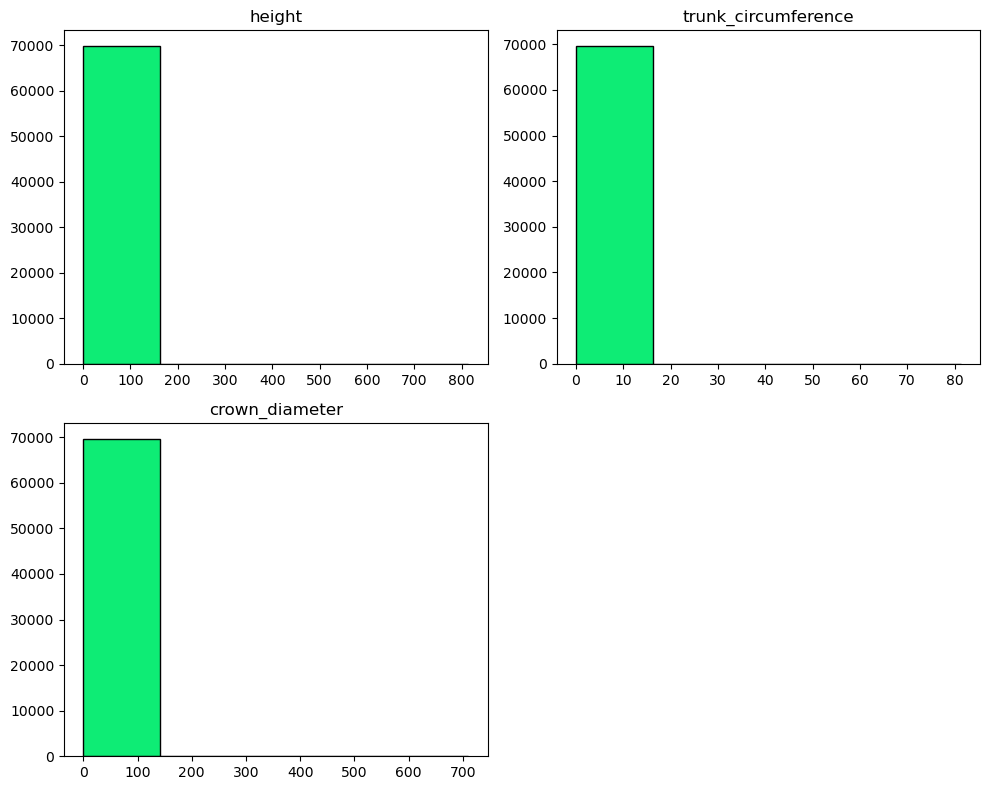

In [40]:
# histograms for all columns which contain measurements of the trees

color = '#0eec75'

# grid size
nrows, ncols = 2,2  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(trees_measure.columns):
        ax.set_visible(False)  # hide uneased plots
        continue
    ax.hist(trees_measure.iloc[:, i], bins=5, color=color, edgecolor='black')
    ax.set_title(trees_measure.columns[i])

plt.tight_layout()
plt.show()

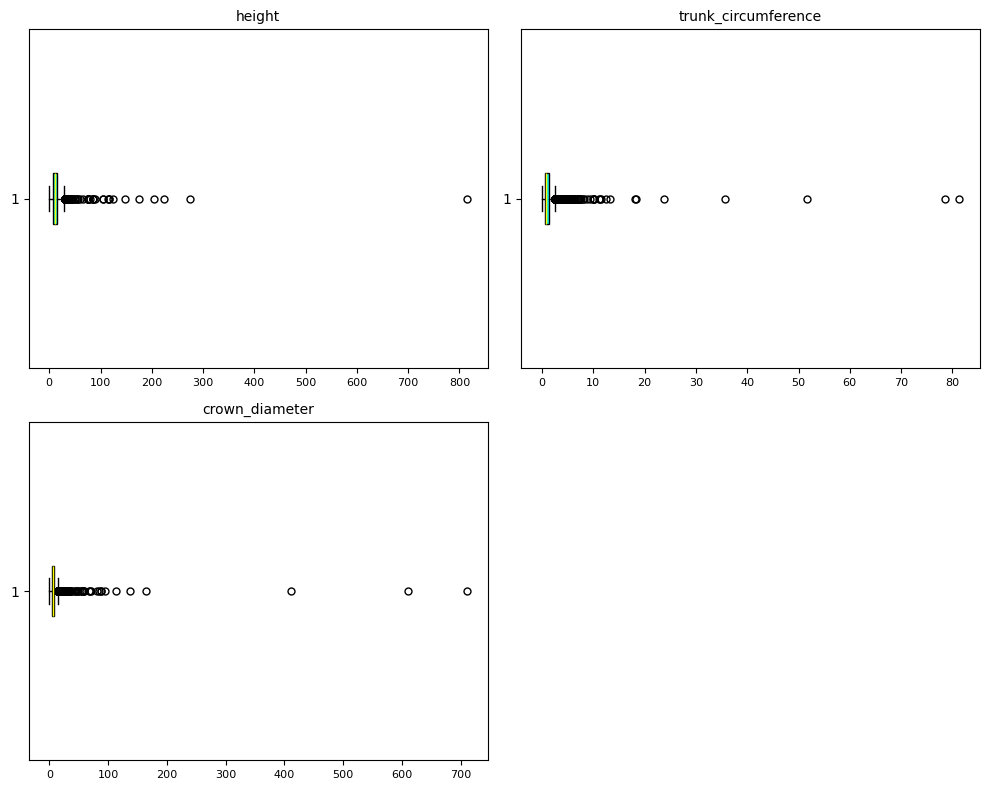

In [41]:
# boxplots for these columns (in different diagramms because of the very different scales)

color = '#0eece8'

# grid size
nrows, ncols = 2,2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,8))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(trees_measure.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(trees_measure.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(trees_measure.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions:</strong> From the histograms and especially from the boxplots, we can see that there are many outliers at the higher end of the values. For the column trunk_circumference this seems to be realistic because the maximum value is well inside normal measurements. Yet for the columns height and crown_diameter this must be because of wrong data entries because the existence of trees with these measurements are not possible. The faulty entries could either be a missing "." to separate numbers correctly or entirely wrong. To explore this more deeply, I will now look into these two columns and then decide how to proceed.
</div>
</div>


<h3 style="color: #ec300e;">1: Column "height"</h3>

<p>The <a href="https://de.wikipedia.org/wiki/Waldtraut_vom_M%C3%BChlwald" target="_blank" style="color: #004085; text-decoration: underline;">highest tree in Germany</a> allegedly is 67 m, for now I will look at all trees which are higher than 40 m to get an impression of which data entries might be faulty.</p>

In [44]:
# filtering rows in which 'height' > 40
height_40 = df2[df2['height'] > 40]
height_40.sort_values("height")

,lat,long,genus,species,alley_tree,height,trunk_circumference,crown_diameter,sponsorship
28973,54.07,12.09,Abies,Abies grandis,0,41.00,3.08,10.00,0
52495,54.11,12.17,Acer,Acer pseudoplatanus,0,45.00,0.57,4.00,0
54061,54.11,12.17,Acer,Acer species,0,45.00,0.69,7.00,0
23467,54.15,12.07,Acer,Acer pseudoplatanus,0,45.00,0.47,4.60,0
32342,54.16,12.05,Sorbus,Sorbus intermedia,0,45.00,0.18,1.20,0
54050,54.11,12.17,Acer,Acer species,0,45.00,0.69,7.00,0
39502,54.17,12.09,Tilia,Tilia cordata,1,45.00,0.40,4.00,0
59197,54.15,12.05,Malus,Malus sylvestris,0,45.00,0.25,2.00,0
11659,54.17,12.01,Populus,Populus nigra,1,50.00,1.26,8.00,0
12831,54.17,12.01,Populus,Populus nigra,0,50.00,1.32,5.40,0


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions Outliers in Height:</strong>
    <p>After researching the maximum height of many of these species, it is clear that these extreme values in height cannot be correct. I will first check the maximum values per species, let ChatGPT compare these to other sources online and then drop replace values in height which are not possible for this species of tree with the median height of the other trees of this specific species. I will limit this filter to only the categories in species which have the 50 highest values in height because the others seem realistic measures.</p>
</div>

In [88]:
max_values_height_per_species = df2.groupby("species")["height"].max()
max_values_height_per_species.sort_values(ascending=False)[:50]

species
Tilia platyphyllos                     814.00
Populus x canadensis                   275.00
Populus nigra                          224.00
Acer species                           205.00
Quercus robur                          125.00
Betula pendula                         117.00
Acer pseudoplatanus                    115.00
Tilia tomentosa                        105.00
Acer rubrum                             89.00
Fagus sylvatica                         80.00
Malus domestica                         75.00
Aesculus hippocastanum                  75.00
Quercus species                         59.00
Acer ginnala                            57.00
Fraxinus excelsior                      55.00
Acer platanoides                        55.00
Tilia cordata                           45.00
Sorbus intermedia                       45.00
Malus sylvestris                        45.00
Abies grandis                           41.00
Populus species                         40.00
Tilia species             

In [91]:
# of the above list, the following keys indicate the categories where the values in height seem unrealistically high
# the values in the dictionary are the maximum values in height which ChatGPT researched + 10 % to allow realistic deviation

# storing maximal heights per species in a dictionary
species_height_limits = {
    "Tilia platyphyllos": 44,
    "Populus x canadensis": 39,
    "Populus nigra": 39,
    "Acer species": 33,
    "Quercus robur": 44,
    "Betula pendula": 33,
    "Acer pseudoplatanus": 39,
    "Tilia tomentosa": 44,
    "Acer rubrum": 28,
    "Fagus sylvatica": 44,
    "Malus domestica": 14,
    "Aesculus hippocastanum": 33,
    "Acer ginnala": 11,
    "Sorbus intermedia": 17,
    "Malus sylvestris": 14,
    "Populus species": 39,
    "Thuja species": 22,
    "Populus balsamifera": 33,
    "Robinia species": 28,
    "Carpinus betulus": 28,
    "Salix species": 28,
    "Ulmus species": 28,
    "Aesculus flava": 28
}


In [93]:
# function to filter out the data which is most likely faulty
def replace_outliers_with_median(group):
    species = group.name
    limit = species_height_limits.get(species, float('inf'))  # no limit if genus is not in dictionary
    mask = group > limit
    median_value = group[~mask].median()  # median of valid values
    group[mask] = median_value  # replacing unrealistic values
    return group

# Werte in "height" nach Kategorien in "species" verarbeiten
df2['height'] = df2.groupby('species')['height'].transform(replace_outliers_with_median)

In [95]:
# checking result
max_values_height_per_species = df2.groupby("species")["height"].max()
max_values_height_per_species.sort_values(ascending=False)[:10]

species
Quercus species                59.00
Fraxinus excelsior             55.00
Acer platanoides               55.00
Tilia cordata                  45.00
Abies grandis                  41.00
Tilia species                  39.00
Fagus species                  38.00
Windschutz Laub-Mischbestand   38.00
Populus x canadensis           38.00
Picea species                  37.00
Name: height, dtype: float64

In [99]:
df2.shape

(71204, 9)

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions Cleaning Height:</strong> I cleaned all outliers in height by replacing the values which were faulty with the median of height of the specific species. Through this, no data was lost. 
</div>

<h3 style="color: #ec300e;">2: Column "crown_diameter"</h3>

xx text

In [110]:
# filtering rows in which 'crown_diameter' is more than 30 m 
crown_diameter_30 = df2[df2['crown_diameter'] > 30]
crown_diameter_30.sort_values("crown_diameter", ascending=False)

,lat,long,genus,species,alley_tree,height,trunk_circumference,crown_diameter,sponsorship
69211,54.09,12.13,Acer,Acer platanoides,0,15.00,0.87,710.00,0
65575,54.12,12.05,Ailanthus,Ailanthus altissima,0,16.00,1.36,610.00,0
65298,54.12,12.06,Fraxinus,Fraxinus excelsior,0,15.00,0.81,411.00,0
61729,54.13,12.17,Populus,Populus x canadensis,0,34.00,1.42,164.00,0
67938,54.10,12.09,Acer,Acer platanoides,0,16.00,1.86,138.00,0
71174,54.09,12.13,Betula,Betula species,0,26.00,1.67,114.00,0
37454,54.11,12.12,Tilia,Tilia cordata,0,14.00,0.90,95.00,0
9144,54.11,12.17,Tilia,Tilia cordata,1,12.00,1.19,88.00,0
32906,54.07,12.13,Acer,Acer pseudoplatanus,0,10.00,1.10,87.00,0
41387,54.07,12.13,Platanus,Platanus x acerifolia,1,8.00,0.57,84.20,0


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions Outliers in Crown Diameter:</strong>
    <p>TEXT TEXT TEX T ANPASSEN AN COLUMN SELBE METHODE WIOE BEI HEIGHT HIER ANWEDEN After researching the maximum height of many of these species, it is clear that these extreme values in height cannot be correct. I will first check the maximum values per species, let ChatGPT compare these to other sources online and then drop replace values in height which are not possible for this species of tree with the median height of the other trees of this specific species. I will limit this filter to only the categories in species which have the 50 highest values in height because the others seem realistic measures.</p>
</div>

In [91]:
"""

# of the above list, the following keys indicate the categories where the values in height seem unrealistically high
# the values in the dictionary are the maximum values in height which ChatGPT researched + 10 % to allow realistic deviation

# storing maximal heights per species in a dictionary
species_height_limits = {
    "Tilia platyphyllos": 44,
    "Populus x canadensis": 39,
    "Populus nigra": 39,
    "Acer species": 33,
    "Quercus robur": 44,
    "Betula pendula": 33,
    "Acer pseudoplatanus": 39,
    "Tilia tomentosa": 44,
    "Acer rubrum": 28,
    "Fagus sylvatica": 44,
    "Malus domestica": 14,
    "Aesculus hippocastanum": 33,
    "Acer ginnala": 11,
    "Sorbus intermedia": 17,
    "Malus sylvestris": 14,
    "Populus species": 39,
    "Thuja species": 22,
    "Populus balsamifera": 33,
    "Robinia species": 28,
    "Carpinus betulus": 28,
    "Salix species": 28,
    "Ulmus species": 28,
    "Aesculus flava": 28
}


In [93]:
"""

# function to filter out the data which is most likely faulty
def replace_outliers_with_median(group):
    species = group.name
    limit = species_height_limits.get(species, float('inf'))  # no limit if genus is not in dictionary
    mask = group > limit
    median_value = group[~mask].median()  # median of valid values
    group[mask] = median_value  # replacing unrealistic values
    return group

# Werte in "height" nach Kategorien in "species" verarbeiten
df2['height'] = df2.groupby('species')['height'].transform(replace_outliers_with_median)

In [95]:
"""
# checking result
max_values_height_per_species = df2.groupby("species")["height"].max()
max_values_height_per_species.sort_values(ascending=False)[:10]

species
Quercus species                59.00
Fraxinus excelsior             55.00
Acer platanoides               55.00
Tilia cordata                  45.00
Abies grandis                  41.00
Tilia species                  39.00
Fagus species                  38.00
Windschutz Laub-Mischbestand   38.00
Populus x canadensis           38.00
Picea species                  37.00
Name: height, dtype: float64

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions Cleaning Crown Diameter:</strong> TEXT TEXT ANPASSEN AN COLUMN UND ERGEBNISSE I cleaned all outliers in height by replacing the values which were faulty with the median of height of the specific species. Through this, no data was lost. 
</div>

<h2 style="color: #ec7511;">Analysing the Relation between Genus and Species</h2>

In [36]:
# unique values in species per genus
for genus, group in df2.groupby('genus'):
    print(f"Genus: {genus}")
    print(group['species'].nunique())  # number of unqiue values in species
    print(group['species'].unique()) # unique values
    print("-" * 50)

Genus: Abies
10
['Abies procera' 'Abies grandis' 'Abies alba' 'Abies concolor'
 'Abies nordmanniana' 'Abies balsamea' 'Abies species' 'Abies homolepis'
 'Abies cephalonica' 'Abies procera „Glauca“']
--------------------------------------------------
Genus: Acer
42
['Acer platanoides' 'Acer saccharum' 'Acer pseudoplatanus' 'Acer species'
 'Acer ginnala' 'Acer pseudoplatanus „Bruchem“' 'Acer campestre'
 'Acer negundo' 'Acer platanoides „Deborah“'
 'Acer campestre „Huiberts Elegant“' 'Acer saccharinum'
 'Acer campestre „Elsrijk“' 'Acer platanoides „Laciniatum“' 'Acer opalus'
 'Acer platanoides „Olmstedt“' 'Acer platanoides „Fairview“'
 'Acer platanoides „Cleveland“' 'Acer tataricum' 'Acer rubrum'
 'Acer pseudoplatanus „Erectum“' 'Acer davidii'
 'Acer platanoides „Globosum“' 'Acer rubrum „Scanlon“'
 'Acer platanoides „Emerald Queen“' 'Acer platanoides „Schwedleri“'
 'Acer platanoides „Allershausen“' 'Acer platanoides „Apollo“'
 'Acer rubrum „Red Sunset“' 'Acer pseudoplatanus „Atropurpureum

<h3 style="color: #ec300e;">Cleaning Categories in "genus" and "species"</h3>

see concult w chatgpt for this

<h2 style="color: #ec7511;">Checking Null Values</h2>

In [73]:
df2.isna().sum()

lat                       0
long                      0
genus                     0
species                   0
alley_tree                0
height                 1436
trunk_circumference    1634
crown_diameter         1529
sponsorship               0
dtype: int64

In [75]:
print(f"The proportion of NaNs in height: {round(df2.height.isnull().sum() / len(df2) * 100, 2)} %")
print(f"The proportion of NaNs in trunk_circumference: {round(df2.trunk_circumference.isnull().sum() / len(df2) * 100, 2)} %")
print(f"The proportion of NaNs in crown_diameter: {round(df2.crown_diameter.isnull().sum() / len(df2) * 100, 2)} %")

The proportion of NaNs in height: 2.02 %
The proportion of NaNs in trunk_circumference: 2.29 %
The proportion of NaNs in crown_diameter: 2.15 %


<h4 style="color: #bb1010;">Checking Curious Categories in "genus"</h4>

In [120]:
# one category in genus is called "Species" and it only contains one value which translated means "Various or tree species unknown"
df2[df2.genus == "Species"]

,lat,long,genus,species,alley_tree,height,trunk_diameter,trunk_circumference,crown_diameter,sponsorship
111,54.11,12.15,Species,Verschiedene oder Baumart unbekannt,0,NaN,NaN,NaN,NaN,0
1118,54.08,12.07,Species,Verschiedene oder Baumart unbekannt,0,NaN,NaN,NaN,NaN,0
1159,54.07,12.08,Species,Verschiedene oder Baumart unbekannt,0,12.00,25.00,78.54,2.00,0
1505,54.08,12.18,Species,Verschiedene oder Baumart unbekannt,0,29.00,44.56,140.00,8.80,0
1518,54.09,12.15,Species,Verschiedene oder Baumart unbekannt,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
68289,54.10,12.17,Species,Verschiedene oder Baumart unbekannt,0,NaN,NaN,NaN,NaN,0
68290,54.10,12.17,Species,Verschiedene oder Baumart unbekannt,0,NaN,NaN,NaN,NaN,0
68291,54.10,12.17,Species,Verschiedene oder Baumart unbekannt,0,NaN,NaN,NaN,NaN,0
68292,54.10,12.17,Species,Verschiedene oder Baumart unbekannt,0,NaN,NaN,NaN,NaN,0


In [134]:
# rows containg the value "Species" in the column "genus" will be dropped as they contain no information which can be connected to a specific tree
df2 = df2[df2['genus'] != 'Species']

# resetting the index (dropping the old one)
df2.reset_index(drop=True, inplace=True) 

In [138]:
# checking the impact of this on the number on NaNs
df2.isna().sum()

lat                       0
long                      0
genus                     0
species                   0
alley_tree                0
height                 1321
trunk_diameter         1519
trunk_circumference    1519
crown_diameter         1414
sponsorship               0
dtype: int64

some NaNs were dealt with through this:

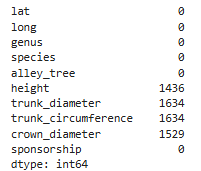

In [80]:
# another category in "genus" is called "Gruppenbäume" which means "group trees". The categories in column "species" belonging to this category are very diverse (different species of trees in one cell etc.) 
df2[df2['genus'] == 'Gruppenbäume']

,lat,long,genus,species,alley_tree,height,trunk_diameter,trunk_circumference,crown_diameter,sponsorship
5,54.11,12.15,Gruppenbäume,Fichten-Kiefer-Mischbestand,0,20.00,51.00,160.22,13.00,0
6,54.13,12.05,Gruppenbäume,Windschutz Laub-Mischbestand,0,NaN,NaN,NaN,NaN,0
7,54.07,12.11,Gruppenbäume,Ahorn-Laub-Mischbestand,0,NaN,25.00,78.54,NaN,0
23,54.07,12.18,Gruppenbäume,Fichten-Kiefer-Mischbestand,0,21.00,96.00,301.59,16.00,0
119,54.07,12.11,Gruppenbäume,Bruchwald Erle Mischbestand,0,13.00,25.00,78.54,4.00,0
...,...,...,...,...,...,...,...,...,...,...
71097,54.11,12.14,Gruppenbäume,Birken-Weichholz-Bestand,0,13.00,20.37,64.00,5.00,0
71098,54.11,12.15,Gruppenbäume,Erlenbestand,0,18.00,40.11,126.00,6.00,0
71139,54.10,12.17,Gruppenbäume,Windschutz Laub-Mischbestand,0,13.00,28.97,91.00,6.00,0
71171,54.11,12.16,Gruppenbäume,Bruchwald Erle Mischbestand,0,20.00,60.16,189.00,12.00,0


In [178]:
# this category of "genus" will be dropped as is not useful because it cannot be connected to a specific type of tree
df2 = df2[df2['genus'] != 'Gruppenbäume']

# resetting the index (dropping the old one)
df2.reset_index(drop=True, inplace=True)

In [183]:
# checking the impact of this on the number on NaNs
df2.isna().sum()

lat                       0
long                      0
genus                     0
species                   0
alley_tree                0
height                 1181
trunk_diameter         1442
trunk_circumference    1442
crown_diameter         1228
sponsorship               0
dtype: int64

again some NaNs were dealt with through this:

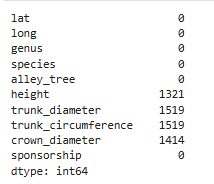

<h3 style="color: #ec300e;">How to Handle Null Values</h3>

I will be trying to handle null values with giving up as little data as possible:
- As the missing values are all in numerical columns, and the parameters are most likely related to the tree genus/ species, my aim is to **replace the missing values with mean or median of the columns per subgroup (genus or species of tree, tbd)**.
- If this is justifiable will be dependent on the data foundation in each subgroup, therefore, I will be checking first the species and then the genus and the **share of NaNs in each subgroup**.
- Preferably, I would replace the NaNs with median/mean values from **species** because this is the smaller-scaled variable (genus is the superordinate category of species).

<h4 style="color: #bb1010;">Null values per Genus</h4>

In [198]:
# checking the share of NaNs for each column with NaNs per category in genus

# storing total number of values in each genus in a variable
genus_values = df2['genus'].value_counts()

# creating a dataframe to evaluate total values and share of NaNs (per genus) for each column with NaNs
nan_summary_genus_height = pd.DataFrame({
    "total_values_in_genus": genus_values,
    "nan_values_height_per_genus": df2[df2['height'].isna()]['genus'].value_counts()
}).fillna(0)
nan_summary_genus_trunk_circumference = pd.DataFrame({
    "total_values_in_genus": genus_values,
    "nan_values_trunk_circumference_per_genus": df2[df2['trunk_circumference'].isna()]['genus'].value_counts()
}).fillna(0)
nan_summary_genus_crown_diameter = pd.DataFrame({
    "total_values_in_genus": genus_values,
    "nan_values_crown_diameter_per_genus": df2[df2['crown_diameter'].isna()]['genus'].value_counts()
}).fillna(0)

nan_summary_genus_height["share_of_nan_in_height_per_genus"] = (nan_summary_genus_height["nan_values_height_per_genus"]
                                                  / nan_summary_genus_height["total_values_in_genus"])
nan_summary_genus_trunk_circumference["share_of_nan_in_trunk_circumference_per_genus"] = (nan_summary_genus_trunk_circumference["nan_values_trunk_circumference_per_genus"]
                                                  / nan_summary_genus_trunk_circumference["total_values_in_genus"])
nan_summary_genus_crown_diameter["share_of_nan_in_crown_diameter_per_genus"] = (nan_summary_genus_crown_diameter["nan_values_crown_diameter_per_genus"]
                                                  / nan_summary_genus_crown_diameter["total_values_in_genus"])

In [220]:
# displaying share of NaNs in height per genus
nan_summary_genus_height.sort_values("share_of_nan_in_height_per_genus", ascending=False)[:3]

,total_values_in_genus,nan_values_height_per_genus,share_of_nan_in_height_per_genus
genus,,,
Broussonetia,1,1.00,1.00
Viburnum,3,2.00,0.67
Euonymus,7,1.00,0.14


In [204]:
# displaying share of NaNs in trunk_circumference per genus
nan_summary_genus_trunk_circumference.sort_values("share_of_nan_in_trunk_circumference_per_genus", ascending=False)[:3]

,total_values_in_genus,nan_values_trunk_circumference_per_genus,share_of_nan_in_trunk_circumference_per_genus
genus,,,
Broussonetia,1,1.00,1.00
Viburnum,3,2.00,0.67
Euonymus,7,1.00,0.14


In [206]:
# displaying share of NaNs in crown_diameter per genus
nan_summary_genus_crown_diameter.sort_values("share_of_nan_in_crown_diameter_per_genus", ascending=False)[:3]

,total_values_in_genus,nan_values_crown_diameter_per_genus,share_of_nan_in_crown_diameter_per_genus
genus,,,
Broussonetia,1,1.00,1.00
Viburnum,3,2.00,0.67
Euonymus,7,1.00,0.14


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;">
    <strong>Conclusions:</strong> Two categories in "genus" are the main sources of NaNs in the tree measurements. For these two categories, the share of NaNs is very high (100%, respectively 2/3 of the values) and this goes for all concerned columns. 
</div>

<h4 style="color: #bb1010;">Null values per Species</h4>

In [186]:
# checking the share of NaNs for each column with NaNs per category in species

# storing total number of values in each species in a variable
species_values = df2['species'].value_counts()

# creating a dataframe to evaluate total values and share of NaNs (per species) for each column with NaNs
nan_summary_species_height = pd.DataFrame({
    "total_values_in_species": species_values,
    "nan_values_height_per_species": df2[df2['height'].isna()]['species'].value_counts()
}).fillna(0)
nan_summary_species_trunk_circumference = pd.DataFrame({
    "total_values_in_species": species_values,
    "nan_values_trunk_circumference_per_species": df2[df2['trunk_circumference'].isna()]['species'].value_counts()
}).fillna(0)
nan_summary_species_crown_diameter = pd.DataFrame({
    "total_values_in_species": species_values,
    "nan_values_crown_diameter_per_species": df2[df2['crown_diameter'].isna()]['species'].value_counts()
}).fillna(0)

nan_summary_species_height["share_of_nan_in_height_per_species"] = (nan_summary_species_height["nan_values_height_per_species"]
                                                  / nan_summary_species_height["total_values_in_species"])
nan_summary_species_trunk_circumference["share_of_nan_in_trunk_circumference_per_species"] = (nan_summary_species_trunk_circumference["nan_values_trunk_circumference_per_species"]
                                                  / nan_summary_species_trunk_circumference["total_values_in_species"])
nan_summary_species_crown_diameter["share_of_nan_in_crown_diameter_per_species"] = (nan_summary_species_crown_diameter["nan_values_crown_diameter_per_species"]
                                                  / nan_summary_species_crown_diameter["total_values_in_species"])

In [188]:
# displaying share of NaNs in height per species
nan_summary_species_height.sort_values("share_of_nan_in_height_per_species", ascending=False)[:12]

,total_values_in_species,nan_values_height_per_species,share_of_nan_in_height_per_species
species,,,
Ulmus glabra „Exoniensis“,1,1.00,1.00
Viburnum dentatum,2,2.00,1.00
Broussonetia papyrifera,1,1.00,1.00
Prunus armeniaca,1,1.00,1.00
Tilia cordata „Erecta“,1,1.00,1.00
Acer pseudoplatanus „Bruchem“,5,5.00,1.00
Tilia oliveri,1,1.00,1.00
Prunus avium „Große Schwarze Knorpelkirsche“,14,12.00,0.86
Salix nigra,31,12.00,0.39


In [192]:
# displaying share of NaNs in trunk_circumference per species
nan_summary_species_trunk_circumference.sort_values("share_of_nan_in_trunk_circumference_per_species", ascending=False)[:19]

,total_values_in_species,nan_values_trunk_circumference_per_species,share_of_nan_in_trunk_circumference_per_species
species,,,
Malus domestica „Redcats“,4,4.00,1.00
Malus domestica „Suncats“,4,4.00,1.00
Acer pseudoplatanus „Bruchem“,5,5.00,1.00
Ulmus glabra „Exoniensis“,1,1.00,1.00
Malus domestica „Goldparmäne“,1,1.00,1.00
Prunus armeniaca,1,1.00,1.00
Malus domenstica „Starcats“,4,4.00,1.00
Broussonetia papyrifera,1,1.00,1.00
Malus domestica „James Grieve“,1,1.00,1.00


In [196]:
# displaying share of NaNs in crown_diameter per species
nan_summary_species_crown_diameter.sort_values("share_of_nan_in_crown_diameter_per_species", ascending=False)[:20]

,total_values_in_species,nan_values_crown_diameter_per_species,share_of_nan_in_crown_diameter_per_species
species,,,
Tilia oliveri,1,1.00,1.00
Malus domenstica „Starcats“,4,4.00,1.00
Malus domestica „James Grieve“,1,1.00,1.00
Malus domestica „Suncats“,4,4.00,1.00
Ulmus glabra „Exoniensis“,1,1.00,1.00
Broussonetia papyrifera,1,1.00,1.00
Malus domestica „Goldparmäne“,1,1.00,1.00
Prunus armeniaca,1,1.00,1.00
Tilia cordata „Erecta“,1,1.00,1.00


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;">
    <strong>Conclusions:</strong> There are many categories in "species" which have a high share of NaNs regarding the respective column. Yet, many of them contain only a few values at all. So, if I in the end decide not to fill up the NaNs, there will most likely not be a significant loss of data. 
</div>

<h4 style="color: #bb1010;">Conditional Replacement of Tree Metrics with Median</h4>

- If the share of NaNs in that species is **less than 20 %**, I will replace it with the median value of that species.29

In [ ]:
df2.height

In [ ]:
# calculating median of height, trunk_circumference and crown_diameter per species
median_height = df2.groupby('species')['height'].median()
median_trunk_circumference = df2.groupby('species')['trunk_circumference'].median()
median_crown_diameter = df2.groupby('species')['crown_diameter'].median()

# replacing NaNs with species median height, trunk_circumference or crown_diameter
if number_of_nan_in_species < 0.2:
    df2['height'] = df2.apply(
        lambda row: median_height[row['species']] if pd.isna(row['height'] else row['height'],
        axis=1)
    df2['trunk_circumference'] = df2.apply(
        lambda row: median_trunk_circumference[row['species']] if pd.isna(row['trunk_circumference'] else row['trunk_circumference'],
        axis=1)
    df2['crown_diameter'] = df2.apply(
        lambda row: median_crown_diameter[row['species']] if pd.isna(row['crown_diameter'] else row['crown_diameter'],
        axis=1)

# zweiter part: fehlt noch anpassung von number_of_nan_in_species an species

<h2 style="color: #ec7511;">Checking Duplicates</h2>

In [37]:
df2.duplicated().sum()

1

In [47]:
# taking a look at the duplicates
df2[df2.duplicated(keep=False)]

,lat,long,genus,species,alley_tree,height,trunk_diameter,trunk_circumference,crown_diameter,sponsorship
27067,54.13,12.05,Populus,Populus nigra „Italica“,0,30.00,37.00,116.24,2.00,0
27068,54.13,12.05,Populus,Populus nigra „Italica“,0,30.00,37.00,116.24,2.00,0


In [ ]:
# checking the original df to see if this for certain is a duplicate (=same unique identifier)

In [57]:
data.duplicated().sum()

0

<h2 style="color: #ec7511;">Checking Emtpy Spaces</h2>

In [39]:
df2.eq(" ").sum()

lat                    0
long                   0
genus                  0
species                0
alley_tree             0
height                 0
trunk_diameter         0
trunk_circumference    0
crown_diameter         0
sponsorship            0
dtype: int64

<h1 style="color: #e3db24;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #ec7511;">Statistical information about the numerical columns</h2>

In [ ]:
df.describe().T

+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

<h2 style="color: #ec7511;">Selecting numerical</h2>

In [ ]:
num = df.select_dtypes("number")

<h2 style="color: #ec7511;">Checking Distributions</h2>

In [ ]:
# histogram for all numberical columns

color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

In [ ]:
boxplot = num[['value(in_euro)', 'wage(in_euro)', 'release_clause', 'dribbling_total', 'short_passing', 'lf_rating']]

here shoudl be a better way: boxplots in one graphic, all next to each other, loook for code and nclude

In [ ]:
# boxplots for all num columns

color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h2 style="color: #ec7511;">Looking for Correlations</h2>

In [ ]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [ ]:
num_corr = round(num.corr(), 2)

In [ ]:
<div class="alert alert-block alert-info">
Tip # 4
    
- We don't want multicolinearity --> correlation between features biases the model...
- We want high correlations (+ or -) with the target --> valuable information for the predictions</div>

In [ ]:
# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Exercise 4: How to interpret this correlation matrix? Which other correlation methods we know?

### Specific Correlations with the Target

### Perform 3 Plots and Explain the Findings from the Data

### Contigency Tables, Chi-Square...

<h1 style="color: #e3db24;">04 | Data Processing</h1>

<h2 style="color: #ec7511;">X-Y Split</h2>

<h2 style="color: #ec7511;">Normalizing the Data</h2>

<h1 style="color: #e3db24;">05 | Modeling</h1>

<h2 style="color: #ec7511;">Train-Test Split</h2>

<h2 style="color: #ec7511;">Model Validation</h2>

<h1 style="color: #e3db24;">06 | Improving the Model</h1>

<h1 style="color: #e3db24;">07 | Reporting</h1>